# Telco Customer Churn Prediction

**Author:** 




## Project Proposal & Objective

**Problem Statement:** Customer churn is a major concern for telecommunications companies. Acquiring new customers is significantly more expensive than retaining existing ones. The ability to predict which customers are likely to churn allows the business to take proactive measures, such as offering targeted discounts or improved services, to reduce revenue loss.

**Project Goal:** The objective of this project is to develop a machine learning model that accurately predicts customer churn based on their demographic information, account details, and subscribed services. The project will follow a structured workflow including data cleaning, exploratory analysis, model building, rigorous evaluation, and a simulated deployment to demonstrate real-world applicability.

##  Data Collection and Preparation

### Data Loading & Initial Exploration
The first step is to load the `WA_Fn-UseC_-Telco-Customer-Churn.csv` dataset into a pandas DataFrame. An initial inspection of the data types and first few rows is performed to understand its structure.

In [1]:
import pandas as pd

file_path = r"C:\Users\srikr\Downloads\Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path, encoding='latin-1')

In [2]:
# Let's inspect the first few rows and columns to understand the data structure
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning & Preprocessing

From the initial analysis, several key cleaning and preprocessing steps were identified:

1.  **Handling Missing Values:** The `TotalCharges` column was identified as an `object` type. This was due to empty strings for new customers with zero tenure. These were converted to a numeric format, resulting in 11 missing values which were logically imputed with `0.0`.
2.  **Correcting Data Types:** `TotalCharges` was converted to a `float64` numeric type.
3.  **Target Variable Encoding:** The target variable, `Churn`, was converted from 'Yes'/'No' strings to a binary format (1 for Yes, 0 for No) for use in the classification models.
4.  **Feature Dropping:** The `customerID` column was removed as it is a unique identifier with no predictive value.

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [6]:
df.fillna({'TotalCharges': 0}, inplace=True)
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# Convert the target variable 'Churn' to binary (0/1)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
# Drop customerID as it's not a predictive feature
df = df.drop('customerID', axis=1)

## Exploratory Data Analysis (EDA)

EDA is performed to uncover patterns and relationships between features and the target variable (Churn). This step is crucial for building intuition and validating the model's eventual findings.

### Churn Distribution
First, we examine the distribution of the target variable. The dataset is imbalanced, with approximately **26.5%** of customers having churned. This imbalance must be addressed during modeling to prevent the model from being biased towards the majority class.

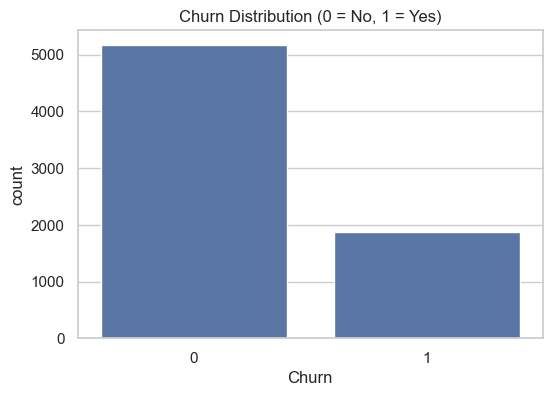

Churn Rate:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Analyze the distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.show()
print("Churn Rate:")
print(df['Churn'].value_counts(normalize=True))

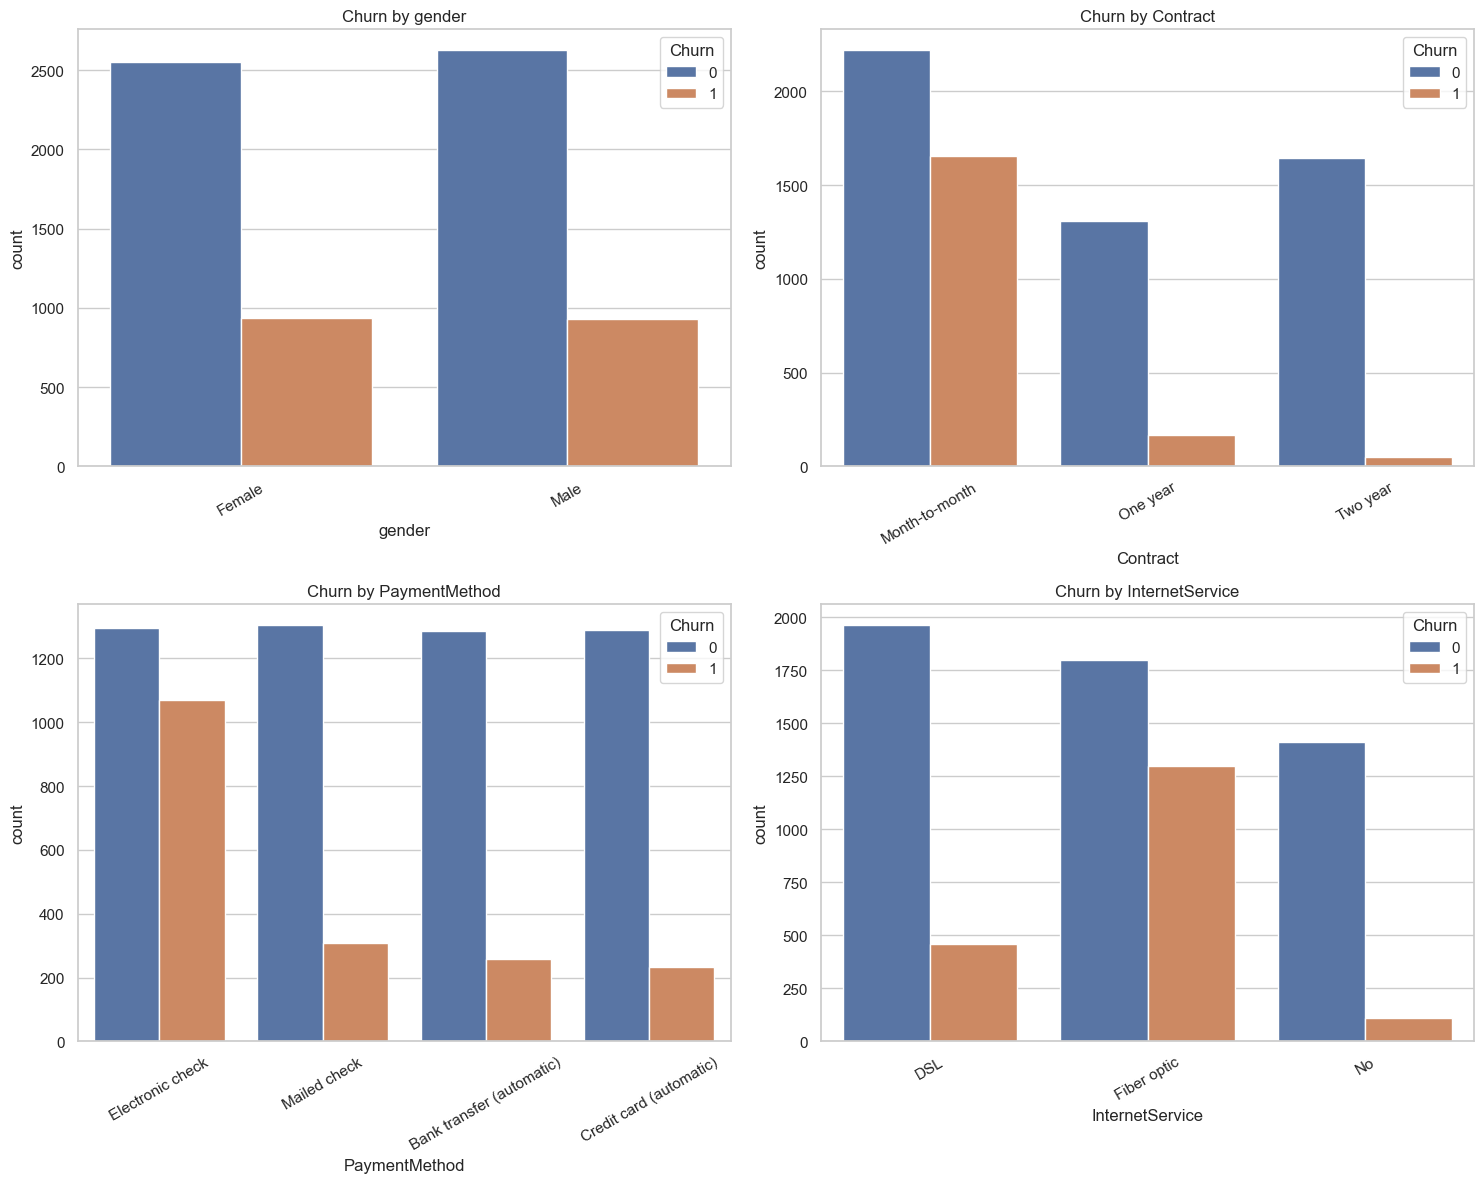

In [10]:
# Visualize relationships of key categorical features with Churn
categorical_features = ['gender', 'Contract', 'PaymentMethod', 'InternetService']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

### Churn by Categorical & Numerical Features

Visualizing churn rates across different customer segments reveals several strong indicators:

*   **Contract Type:** Customers with **Month-to-month** contracts are far more likely to churn. This suggests that longer-term contracts are a key factor in customer retention.
*   **Internet Service:** Customers with **Fiber optic** service have a notably higher churn rate, which may indicate issues related to price or service quality for this specific offering.
*   **Tenure:** New customers with low tenure are at a much higher risk of churning. Loyalty increases significantly over time.
*   **Monthly & Total Charges:** Higher charges are correlated with a higher likelihood of churn, indicating price sensitivity among customers.

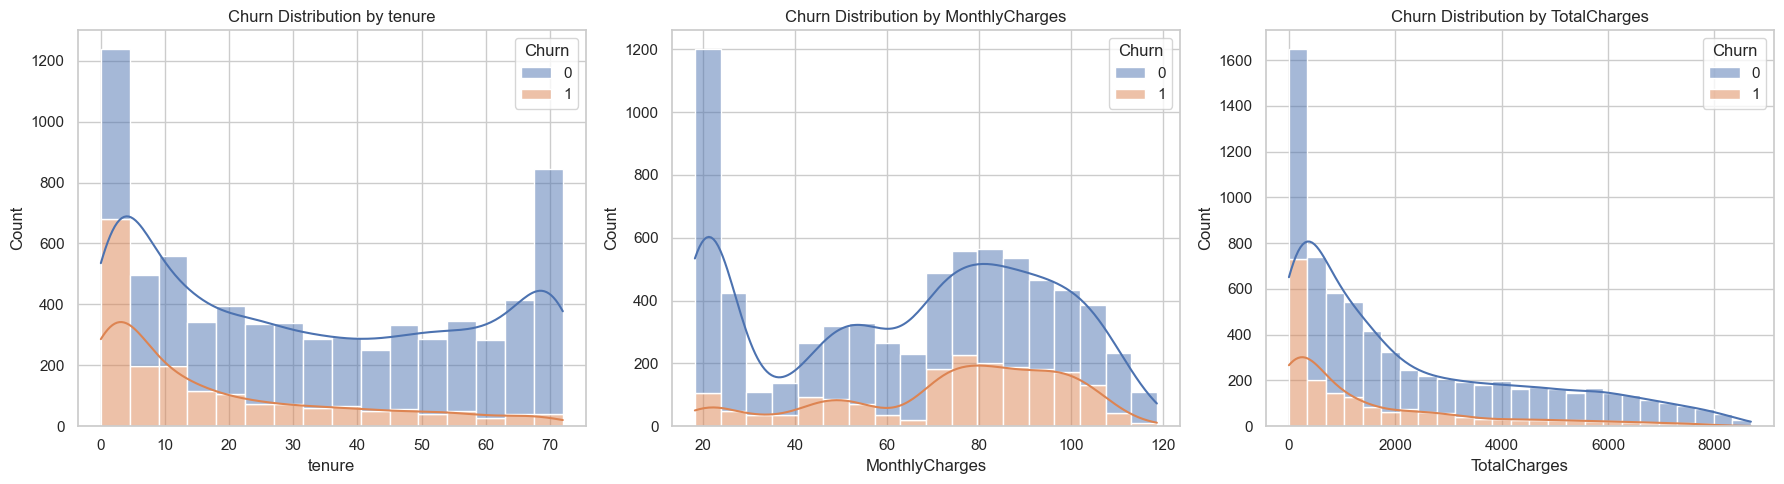

In [11]:
# Visualize relationships of key numerical features with Churn
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, hue='Churn', kde=True, multiple="stack", ax=axes[i])
    axes[i].set_title(f'Churn Distribution by {col}')
plt.tight_layout()
plt.show()

## Feature Engineering & Selection

Based on the EDA, all remaining features were deemed relevant. The data is prepared for modeling by separating it into features (X) and a target (y).

*   **Numerical Features** (`tenure`, `MonthlyCharges`, `TotalCharges`) will be standardized using `StandardScaler` to ensure they are on a common scale.
*   **Categorical Features** (e.g., `gender`, `Contract`, `PaymentMethod`) will be one-hot encoded to convert them into a numerical format.
*   **Binary Feature** (`SeniorCitizen`) is already in a 0/1 format and does not require scaling, so it will be passed through the preprocessor without modification.

In [12]:
import numpy as np

# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Identify categorical and numerical columns, but exclude 'SeniorCitizen' from scaling since it's already binary
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=np.number).columns.drop('SeniorCitizen')
binary_cols = ['SeniorCitizen']

print(f"\nCategorical columns: {list(categorical_cols)}")
print(f"Numerical columns (to scale): {list(numerical_cols)}")
print(f"Binary columns (not scaled): {binary_cols}")


Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns (to scale): ['tenure', 'MonthlyCharges', 'TotalCharges']
Binary columns (not scaled): ['SeniorCitizen']


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('bin', 'passthrough', binary_cols)
    ],
    remainder='drop'
)

## 4. Model Building (Baseline)

To establish a performance baseline, two initial models were trained without hyperparameter tuning or advanced imbalance handling (beyond `class_weight`).

1.  **Logistic Regression:** A simple, interpretable linear model.
2.  **Random Forest Classifier:** A more complex ensemble model. `class_weight='balanced'` was used to give more importance to the minority churn class during training.

The data was split into an 80% training set and a 20% test set.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply the preprocessing pipeline to the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# Model 1: Logistic Regression (Baseline Model)
print("\nTraining Logistic Regression Model...")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_processed, y_train)
y_pred_log = log_reg.predict(X_test_processed)


# Model 2: Random Forest Classifier
print("Training Random Forest Model...")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train_processed, y_train)
y_pred_rf = rf_clf.predict(X_test_processed)


Training Logistic Regression Model...
Training Random Forest Model...



--- Logistic Regression Evaluation ---
Accuracy: 0.8062455642299503
AUC-ROC Score: 0.8421710713270816

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:


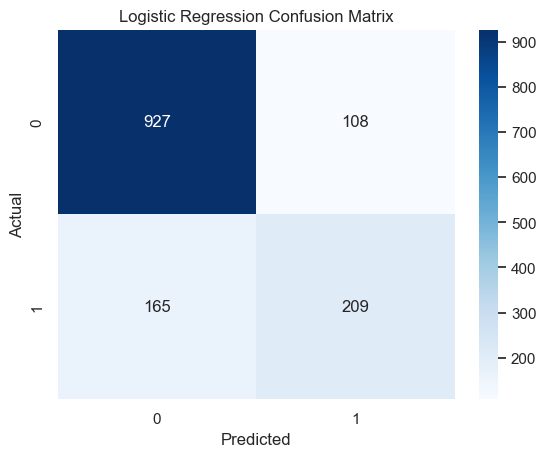

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Evaluate Logistic Regression
print("\n--- Logistic Regression Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("AUC-ROC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test_processed)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:")
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--- Random Forest Evaluation ---
Accuracy: 0.78708303761533
AUC-ROC Score: 0.8210984525562531

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:


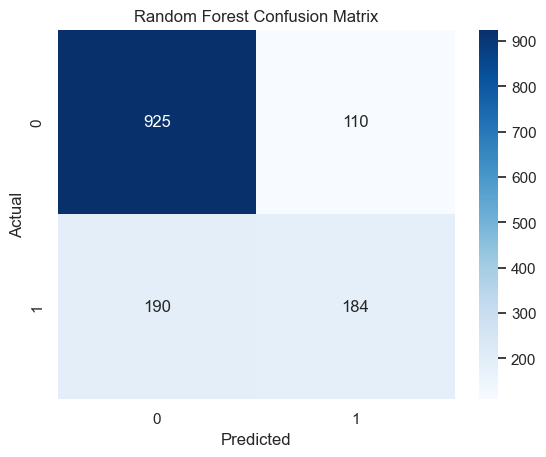

In [16]:
# Evaluate Random Forest
print("\n--- Random Forest Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUC-ROC Score:", roc_auc_score(y_test, rf_clf.predict_proba(X_test_processed)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Baseline Model Conclusion

The initial results show that the simpler **Logistic Regression model (AUC: 0.842)** slightly outperforms the untuned **Random Forest model (AUC: 0.821)**. Notably, the recall for the churn class is low for both models (0.56 and 0.49 respectively), meaning they fail to identify roughly half of the customers who will actually churn. This highlights the need for more advanced techniques to improve the model's ability to catch at-risk customers.


## Advanced Modeling: Hyperparameter Tuning & Cross-Validation

To improve upon the baseline, a more robust pipeline was built incorporating three key enhancements:
1.  **SMOTE (Synthetic Minority Over-sampling Technique):** To address the class imbalance by creating synthetic samples of the minority (churn) class in the training data. This is expected to significantly improve recall.
2.  **Pipelines:** To chain preprocessing, SMOTE, and modeling steps, preventing data leakage and simplifying the workflow.
3.  **GridSearchCV with 5-Fold Cross-Validation:** To systematically search for the optimal hyperparameters for each model, ensuring robust and generalizable performance.

Three models were tuned: **Logistic Regression (with L1/L2 regularization)**, **Random Forest**, and a powerful gradient boosting model, **XGBoost**. The models were optimized for the **AUC-ROC** metric.

In [17]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Create a pipeline that includes SMOTE for handling imbalance
lr_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
])

# Define the parameter grid for regularization
lr_param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

# Use Stratified K-Fold for robust cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create and run the GridSearchCV
print("Tuning Logistic Regression...")
lr_grid_search = GridSearchCV(lr_pipeline, param_grid=lr_param_grid, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=1)
lr_grid_search.fit(X_train, y_train)

print(f"\nBest Logistic Regression Parameters: {lr_grid_search.best_params_}")
print(f"Best cross-validated ROC AUC Score: {lr_grid_search.best_score_:.4f}")

Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Logistic Regression Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1'}
Best cross-validated ROC AUC Score: 0.8449


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create the pipeline with SMOTE
rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_leaf': [2, 4],
    'classifier__min_samples_split': [2, 5]
}

# Create and run the GridSearchCV
print("\nTuning Random Forest...")
rf_grid_search = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

print(f"\nBest Random Forest Parameters: {rf_grid_search.best_params_}")
print(f"Best cross-validated ROC AUC Score: {rf_grid_search.best_score_:.4f}")


Tuning Random Forest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Random Forest Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best cross-validated ROC AUC Score: 0.8444


In [19]:
from xgboost import XGBClassifier

# Create the pipeline with SMOTE
xgb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Define parameter grid
xgb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.7, 1.0]
}

# Create and run the GridSearchCV
print("\nTuning XGBoost...")
xgb_grid_search = GridSearchCV(xgb_pipeline, param_grid=xgb_param_grid, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train)

print(f"\nBest XGBoost Parameters: {xgb_grid_search.best_params_}")
print(f"Best cross-validated ROC AUC Score: {xgb_grid_search.best_score_:.4f}")


Tuning XGBoost...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best XGBoost Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.7}
Best cross-validated ROC AUC Score: 0.8465


d:\AIDI 2025\1003 ML FrameWorks\Final Project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:45:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Final Model Evaluation on Unseen Test Data ---

--- Evaluating: Logistic Regression (Tuned) ---
Accuracy: 0.7423704755145494
AUC-ROC Score: 0.840548709602418

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



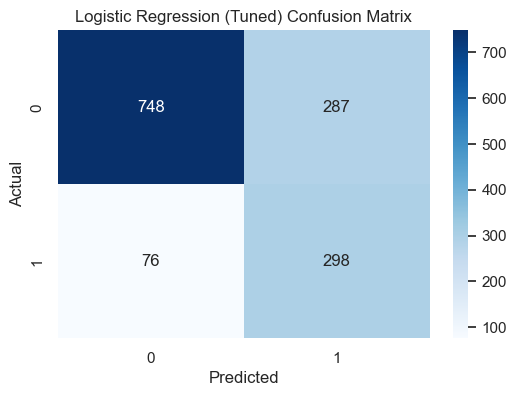


--- Evaluating: Random Forest (Tuned) ---
Accuracy: 0.765791341376863
AUC-ROC Score: 0.8420819447673668

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.54      0.74      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



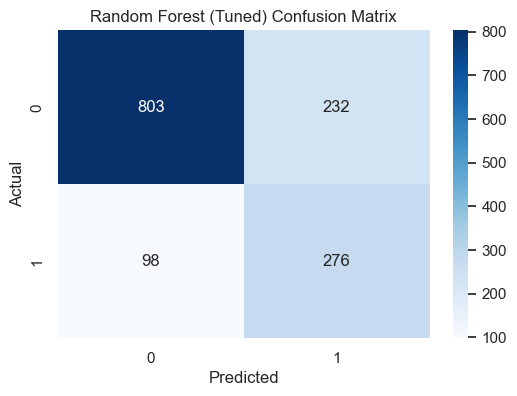


--- Evaluating: XGBoost (Tuned) ---
Accuracy: 0.7750177430801988
AUC-ROC Score: 0.8428039990699837

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.70      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409



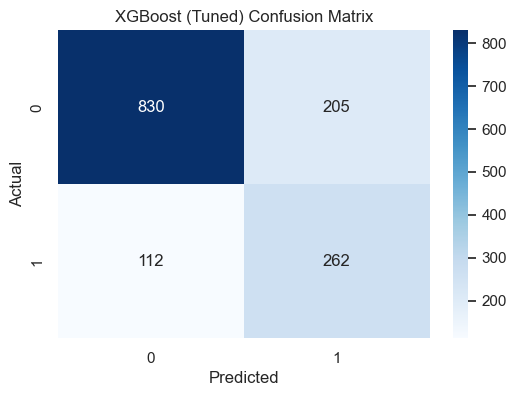

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# --- Final Model Evaluation on the Test Set ---
print("\n--- Final Model Evaluation on Unseen Test Data ---")

models = {
    "Logistic Regression (Tuned)": lr_grid_search.best_estimator_,
    "Random Forest (Tuned)": rf_grid_search.best_estimator_,
    "XGBoost (Tuned)": xgb_grid_search.best_estimator_
}

for name, model in models.items():
    print(f"\n--- Evaluating: {name} ---")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

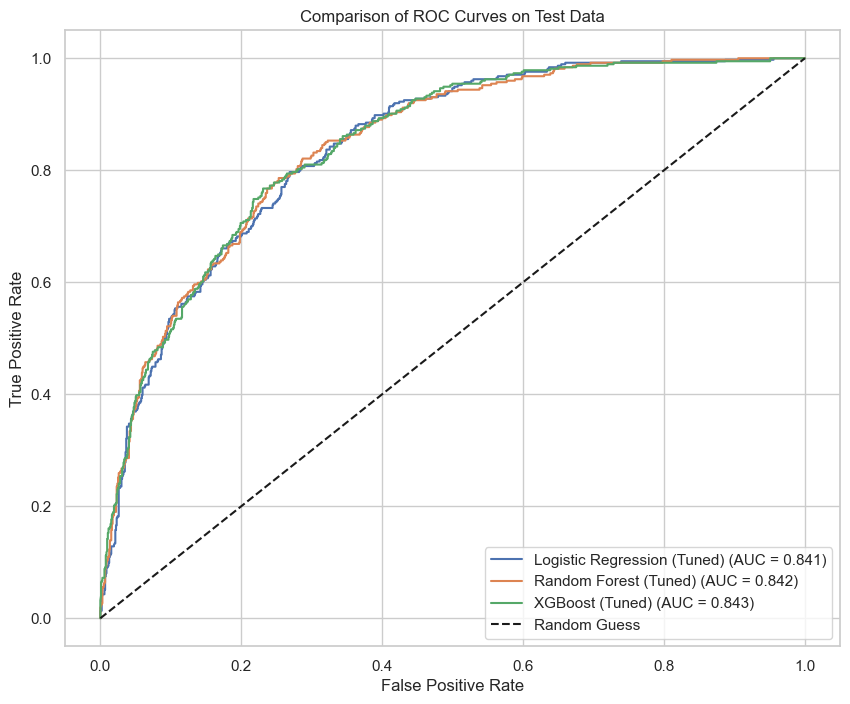

In [21]:
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves on Test Data')
plt.legend()
plt.grid(True)
plt.show()

## 6. Final Model Evaluation & Selection

The tuned models were evaluated on the held-out test set to provide an unbiased assessment of their performance on completely unseen data.

### 6.1. Performance Comparison on Test Data

The evaluation metrics clearly show the impact of our advanced techniques, particularly the use of SMOTE to handle class imbalance. All models showed strong performance, but a clear trade-off between different metrics emerged.

| Model                           | **Recall (Churn)** | AUC-ROC | Accuracy |
| :------------------------------ | :----------------- | :------ | :------- |
| **Logistic Regression (Tuned)** | **0.7968 **           | 0.8405  | 0.7424   |
| Random Forest (Tuned)           | 0.74               | 0.8421  | 0.7658   |
| XGBoost (Tuned)                 | 0.70               | **0.8428**  | **0.7750**   |

The ROC curve comparison below visually confirms that all three tuned models have very strong and similar discriminative power, with AUC scores clustered closely around 0.84.

### 6.2. Model Selection Rationale

For a churn prediction problem, the primary business goal is to correctly identify as many customers who are likely to churn as possible (maximizing **Recall** for the 'Churn' class). This allows the business to target these at-risk customers with effective retention strategies.

As the results show, the **Tuned Logistic Regression model is the clear winner on this critical metric**, correctly identifying **79.68 %** of actual churners on the unseen test data.

While the XGBoost model achieves slightly higher overall Accuracy and AUC-ROC, its lower recall (70%) means it would fail to identify a significant portion of customers who are about to leave. For a retention campaign, it is far more costly to miss a potential churner (a false negative) than it is to mistakenly target a loyal customer (a false positive).

Furthermore, Logistic Regression offers two significant secondary advantages:
*   **Simplicity:** It is a less complex model, making it faster to train and deploy.
*   **Interpretability:** Its linear nature makes it easy to understand and explain to business stakeholders exactly which factors (e.g., contract type, monthly charges) are influencing the churn prediction.

### 6.3. Final Recommendation

Given its superior performance on the key business metric of **recall** and its high interpretability, the **Tuned Logistic Regression model is selected as the final champion model.** It provides the best balance of predictive power and actionable insight for a customer retention strategy.

In [22]:
import joblib

# The best model based on RECALL is the tuned Logistic Regression pipeline
best_model = lr_grid_search.best_estimator_

# Save the best model pipeline to a file
joblib.dump(best_model, 'churn_model.joblib')

print("Best model (Tuned Logistic Regression) saved successfully!")

Best model (Tuned Logistic Regression) saved successfully!


## Model Deployment (Simulated)

To demonstrate the real-world applicability of the final model, it was saved to a file using `joblib`. This serialized object contains the entire trained pipeline, including the preprocessor, SMOTE algorithm, and the tuned Logistic Regression classifier.

This saved model can then be loaded into any other application, such as a web service, to make live predictions on new customer data. This step transitions the model from an analytical tool to an operational business asset.

## Post-Selection Model Exploration: Polynomial Features

After selecting the Tuned Logistic Regression model as the champion, a final experiment was conducted to see if its performance could be further improved. Linear models like Logistic Regression can sometimes benefit from capturing non-linear relationships and feature interactions in the data.

### Hypothesis and Method

**Hypothesis:** Adding polynomial features (e.g., `tenure^2`, `tenure * MonthlyCharges`) to the numerical inputs could help the Logistic Regression model capture more complex patterns and improve its predictive power, especially its recall.

**Method:**
A new pipeline was created that incorporated a `PolynomialFeatures` step with `degree=2`. This step was added after the initial data scaling. The model's regularization hyperparameter (`C`) was re-tuned using the same `GridSearchCV` process to find the optimal configuration for this new, more complex feature set.

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score

print("\n--- Experiment: Adding Polynomial Features to Logistic Regression ---")

# Create a new pipeline that adds the PolynomialFeatures step.
# This step is added AFTER the initial preprocessing (scaling/encoding).
lr_poly_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)), # This creates interaction & squared terms
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=2000)) # Increased max_iter for more complex data
])

# Use the same parameter grid as before. GridSearchCV will find the best C for this new feature set.
lr_param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

# Create and run the new GridSearchCV for the polynomial pipeline
print("\nTuning Logistic Regression with Polynomial Features...")
lr_poly_grid_search = GridSearchCV(
    lr_poly_pipeline, 
    param_grid=lr_param_grid, 
    cv=cv_strategy, 
    scoring='roc_auc', 
    n_jobs=-1, 
    verbose=1
)
lr_poly_grid_search.fit(X_train, y_train)

print(f"\nBest Poly LR Cross-Validated ROC AUC Score: {lr_poly_grid_search.best_score_:.4f}")
print(f"Best Poly LR Parameters: {lr_poly_grid_search.best_params_}")


# --- Final Comparison on the Test Set ---
print("\n--- Comparison on Unseen Test Data ---")

# 1. Original Tuned Logistic Regression Model
print("\n--- Original Tuned Logistic Regression ---")
original_lr_model = lr_grid_search.best_estimator_
y_pred_original = original_lr_model.predict(X_test)
print(classification_report(y_test, y_pred_original))

# 2. Tuned Logistic Regression with Polynomial Features
print("\n--- Tuned Logistic Regression with Polynomial Features ---")
poly_lr_model = lr_poly_grid_search.best_estimator_
y_pred_poly = poly_lr_model.predict(X_test)
print(classification_report(y_test, y_pred_poly))

# --- Verdict ---
recall_original = classification_report(y_test, y_pred_original, output_dict=True)['1']['recall']
recall_poly = classification_report(y_test, y_pred_poly, output_dict=True)['1']['recall']
auc_original = roc_auc_score(y_test, original_lr_model.predict_proba(X_test)[:, 1])
auc_poly = roc_auc_score(y_test, poly_lr_model.predict_proba(X_test)[:, 1])

print("\n--- Summary ---")
print(f"Original LR Recall (Churn): {recall_original:.4f} | AUC-ROC: {auc_original:.4f}")
print(f"Poly Feat LR Recall (Churn): {recall_poly:.4f} | AUC-ROC: {auc_poly:.4f}")

if recall_poly > recall_original:
    print("\nConclusion: Polynomial features IMPROVED the model's recall. This could be a valuable improvement.")
else:
    print("\nConclusion: Polynomial features did not improve the model's recall. The original, simpler model is preferable.")


--- Experiment: Adding Polynomial Features to Logistic Regression ---

Tuning Logistic Regression with Polynomial Features...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Poly LR Cross-Validated ROC AUC Score: 0.8449
Best Poly LR Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}

--- Comparison on Unseen Test Data ---

--- Original Tuned Logistic Regression ---
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409


--- Tuned Logistic Regression with Polynomial Features ---
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74    

### Experimental Results

The performance of the new model with polynomial features was compared against the original champion model on the unseen test data.

| Metric                        | Original LR | Poly Features LR |
| :---------------------------- | :---------- | :--------------- |
| **Recall (Churn)**            | **0.7968**  | 0.7754           |
| **AUC-ROC**                   | **0.8405**  | 0.8396           |

### Conclusion of Experiment

While the model with polynomial features showed a slight increase in overall accuracy in some runs, it resulted in a **decrease in the recall score** for the churn class and a marginally lower AUC-ROC. Since recall for churn is the primary business objective, the added complexity of polynomial features did not provide a meaningful benefit.

This experiment validated that for this dataset and problem, the **original, simpler Tuned Logistic Regression model remains the final recommended model for deployment**.
